<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Clustering</font></h1>
<hr>

# **IMPORTANTE:** Antes de começar 

Execute a célula final desse Lab. Ela irá **inicializar** o seu ambiente com rotinas que são empregadas para essa apresentação inicial.

 # **Clusterização**
 
**Clusterização** é uma tarefa de análise de dados, assim como **Classificação**, e **Regressão**, podendo ser empregados vários modelos para se obter a clusterização, como o *Kmeans* (que veremos aqui), métodos hierárquicos, `dbscan` etc.

Diferentemente dos modelos anteriores a **Clusterização** em geral emprega modelos **Não Supervisionados**.

### **APRENDIZADO SUPERVISIONADO**

> Tarefa: **Regressão**
>> Modelo: Linear, Polinomial, Exponencial etc.

> Tarefa: **Classificação**
>> Modelo: Knn, Árvore de Decisão, Regressão Logística, Redes Neurais etc.

### **APRENDIZADO NÃO SUPERVISIONADO**

> Tarefa: **Clusterização**
>> Modelo: Kmeans, Hierárquico, `dbscan`

 # **Aprendizado Não Supervisionado**
 
Diferentemente do Aprendizado Supervisionado, no Aprendizado não Supervisionado **não há um Conjunto de Treinamento**, e portanto não haverá também um Conjunto de Testes.

O aprendizado feito sobre os dados, capturando algum padrão dos dados, mas sem uma `resposta`, como um valor ou classe, como você encontrou no Aprendizado Supervisionado. Neste sentido dizemos que o **Aprendizado não Supervisionado é mais Analítico que Preditivo**.



## Você identifica quantos grupos de dados na figura abaixo?

Pronto, você acaba de realizar um **Aprendizado não Supervisionado**.





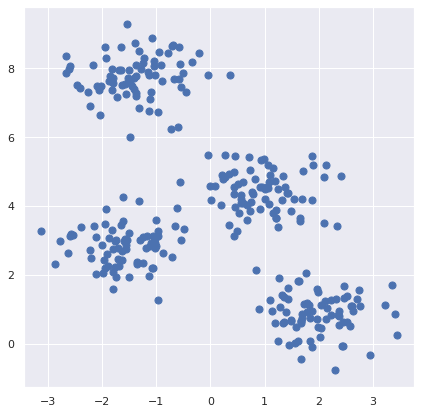

In [ ]:
sns.set()
f = plt.figure(figsize=(7,7))
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

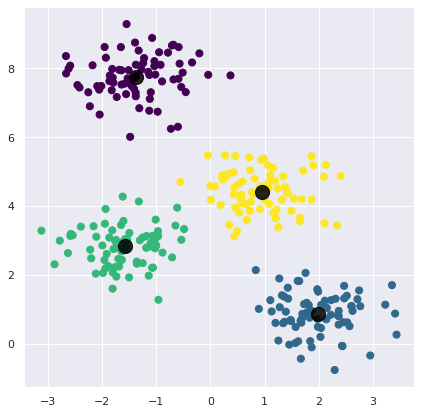

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

f = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.85);

Você talvez tenha achado essa tarefa fácil mas imagine, por exemplo, que você tenha um conjunto 40.000 reclamações de Clientes (Lab T10) com mais de 30 atributos. Você seria capaz de identificar potenciais grupos de reclamações? 

Assim a **clusterização**, a tarefa de encontrar grupos de dados que guardam semelhanças entre si, encontra um grande número de aplicações como Segmentação de Clientes, Sistemas de Recomendação de Produtos ou Análises de grupos de Clientes, Produtos, Fornecedores etc. para tomada de decisão.



# **CUIDADO:**  **Clusterização** $\not=$ **Classificação**

Um erro comum é confundirmos **Clusterização** com **Classificação**. 

Suponha por exemplo um conjunto de dados de Empréstimos onde eles são classificados entre *Tx Padrão* e *Tx Especial* (juros mais baixos). Essa é a classificação dos dados. Mas, se você buscar com alguma técnica "grupos de Empréstimos" que guardem semelhanças entre si, talvez você encontre grupos  que exibem um outra relação dos dados completamente diferente de *Tx Padrão* e *Tx Especial*. Por exemplo, grupos de Empréstimos para Bens de Consumo para Jovens, Empréstimos para Capital de Giro e Outros, em todos eles havendo seus percentuais de *Tx Padrão* e *Tx Especial*. 

Você ainda não vai empregar essa informação para *predizer* novos casos, mas talvez tomar decisões sobre esses grupos, como fazer uma campanha para educação de Jovens sobre o Empréstimo Consciente ou uma redução das Taxas para atrair mais Empréstimos de Capital de Giro.

# Kmédias

O Kmédias sistematiza a forma que você 'observou' diferentes grupos de dados em nosso exemplo inicial.

É um algoritmo que busca de forma iterativa (aproximações sucessivas) minimizar dois objetivos:

$$ min_{c} J_{in} = \sum_{i,k} || x_i - c_k ||^2 $$ 
$$ max_{c} J_{out} = \sum_{i,k} || c_i - c_k ||^2 $$ 

Minimizar as distâncias intragrupos e maximizar as distâncias entre grupos.

\* Aqui empregaremos unicamente a função distância Euclidiana embora outras funções distância possam ser empregadas.

# Algoritmo Kmeans

```
  1. Seleciona k pontos aleatoriamente como centros de cluster
  2. Atribui elementos ao centro de cluster mais próximo de acordo com alguma função distância (euclidiana, por exemplo)
  3. Calcula o novo centróide a partir da média de todos os elementos em cada cluster
  4. Repite as etapas 2 e 3 até que os mesmos pontos sejam atribuídos a cada cluster em rodadas consecutivas

```
Veja o exemplo abaixo em uma dimensão.


# **Kmeans** *1D*

Vamos separar um grupo de visitantes por idade para a visita no museu entre dois monitores?

[array([15, 15, 16, 19, 19, 20, 20, 21, 22, 28, 35, 40, 41, 42, 43, 44, 60,
       61, 65])]
[[16]
 [22]]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[16.8       ]
 [38.71428571]]
[[15 15 16 19 19 20 20 21 22 28 35 40 41 42 43 44 60 61 65]]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[18.55555556]
 [45.9       ]]
[[15 15 16 19 19 20 20 21 22 28 35 40 41 42 43 44 60 61 65]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[[19.5       ]
 [47.88888889]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

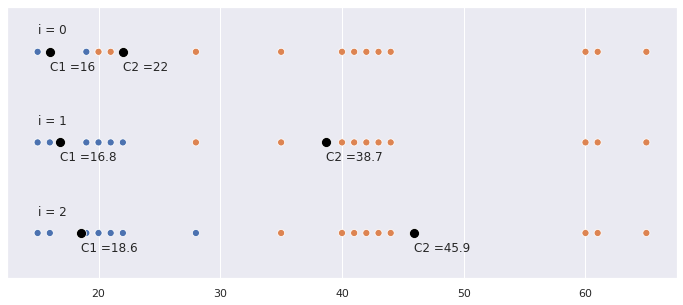

In [ ]:
X = pd.DataFrame({'Age':[15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65]})

kmeansL(X,k=2,pos=[2,8])


# **Kmeans** *2D*

Vamos agora ver o mesmo procedimento em duas dimensões para um grupo de dados aleatório.

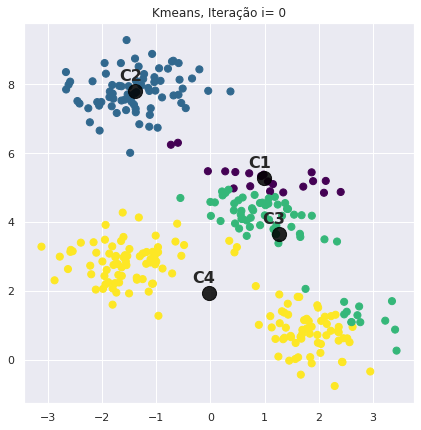

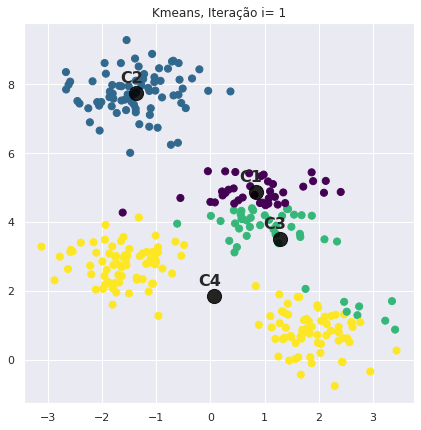

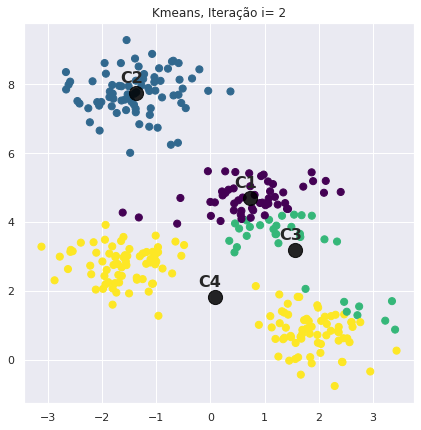

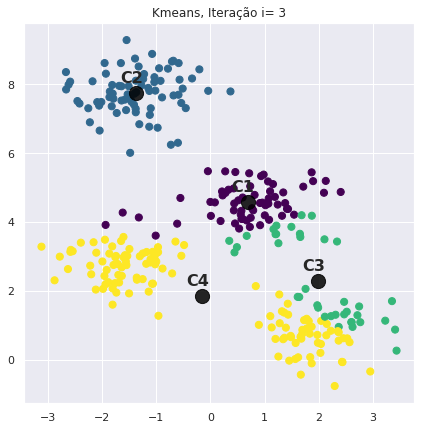

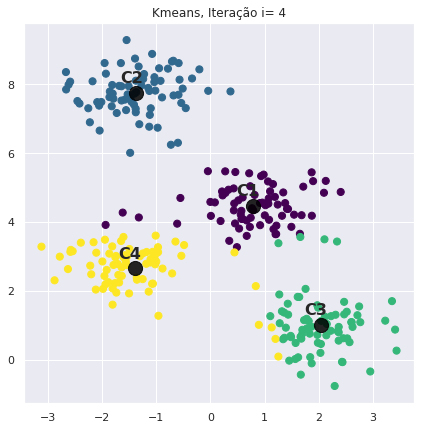

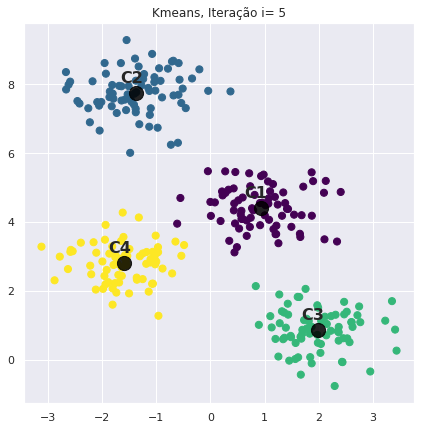

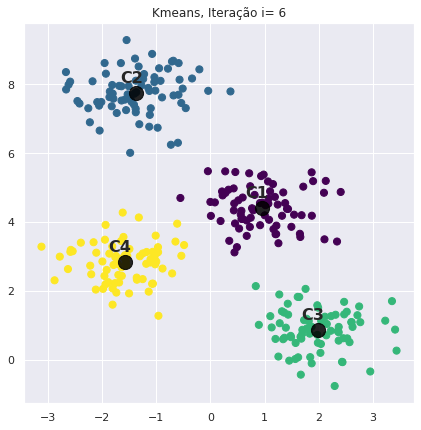

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
centers, labels = find_clusters(X, 4)

## **Case**: Segmentando Estados para Políticas e Campanhas de não Violência

Compare verifique que a estrutura de uso dos modelos é a mesma. 

URL: https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv

Abstract: Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.
http://archive.ics.uci.edu/ml/datasets/communities+and+crime

## Explorando os dados


In [ ]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()
df.isnull().sum()
df.shape

df.describe()



,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Rescale dos dados

Como os dados encontram-se em escalas diferentes e o kmeans é sensível a distância, vamos reescalar os dados empregando a função `StandardScaler` (T10 Lab).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X_matrix = scaler.transform(df)
temp = df.index
df = pd.DataFrame(X_matrix,columns=df.columns)
df.index = temp
df.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


# Separando em 4 Clusters

In [ ]:
# Dados
X = df[['Murder','UrbanPop']] 

# Declara o modelo
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 2 1 2 1 1 0 0 1 2 0 3 1 0 3 0 2 2 3 1 0 1 0 2 1 3 0 1 3 1 1 1 2 3 0 0 0
 0 0 2 3 2 1 0 3 0 0 3 0 0]
[[-0.61181872  0.41593144]
 [ 0.65574179  0.95007158]
 [ 1.23662525 -0.87513091]
 [-1.0975732  -1.23182081]]


In [ ]:
print(pd.concat([df.reset_index(),pd.DataFrame(labels)], axis=1))

             index    Murder   Assault  UrbanPop      Rape  0
0          Alabama  1.255179  0.790787 -0.526195 -0.003451  2
1           Alaska  0.513019  1.118060 -1.224067  2.509424  2
2          Arizona  0.072361  1.493817  1.009122  1.053466  1
3         Arkansas  0.234708  0.233212 -1.084492 -0.186794  2
4       California  0.281093  1.275635  1.776781  2.088814  1
5         Colorado  0.025976  0.402909  0.869548  1.883901  1
6      Connecticut -1.040880 -0.736484  0.799761 -1.092723  0
7         Delaware -0.437875  0.815030  0.450825 -0.585834  0
8          Florida  1.765415  1.990786  1.009122  1.150530  1
9          Georgia  2.229265  0.487757 -0.386621  0.492653  2
10          Hawaii -0.577030 -1.512241  1.218484 -0.111300  0
11           Idaho -1.203228 -0.615272 -0.805344 -0.758392  3
12        Illinois  0.605789  0.948363  1.218484  0.298525  1
13         Indiana -0.136372 -0.700121 -0.037685 -0.025021  0
14            Iowa -1.295998 -1.391029 -0.595982 -1.071153  3
15      

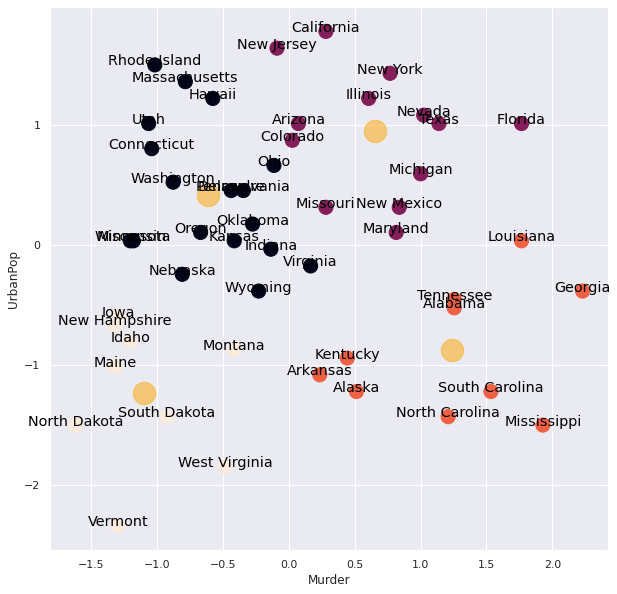

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 500 , c = 'orange' , alpha = 0.5)

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Definindo o número ideal de Clusters

Assim como nos modelos anteriores é importante 'medirmos' o resultado do nosso modelo, seja para sua escolha ou ajuste.

Vamos empregar aqui apenas dois critérios, a **regra do cotovelo** e a **equidade dos grupos**. Existem várias outras métricas para escolha do número de agrupamentos, como por exemplo a técnica de `Silhouette`, mas que não trataremos aqui. 

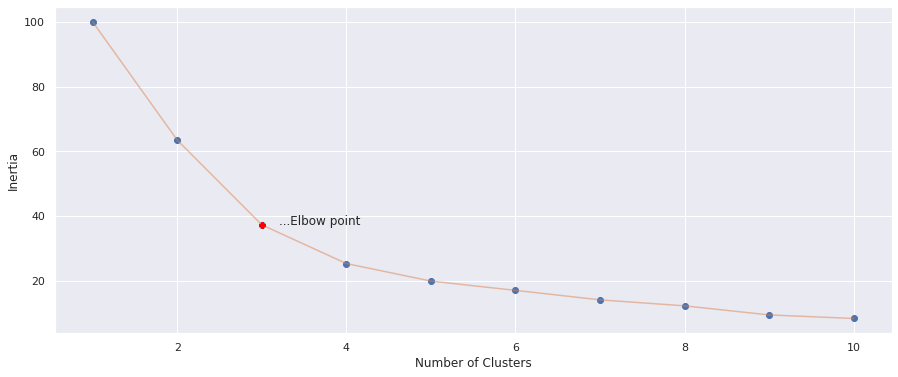

In [ ]:
inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()   

# Recalculando os grupos

In [ ]:
# Dados
X = df[['Murder','UrbanPop']] 

# Declara o modelo
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 0 1 0 0 0 0 1 1 0 2 0 0 2 0 1 1 2 1 0 1 2 1 0 2 2 0 2 0 1 0 1 2 0 0 0
 0 0 1 2 1 0 0 2 1 0 2 2 2]
[[-0.16588978  0.84417079]
 [ 1.12993965 -0.46106046]
 [-1.02303997 -0.89660388]]


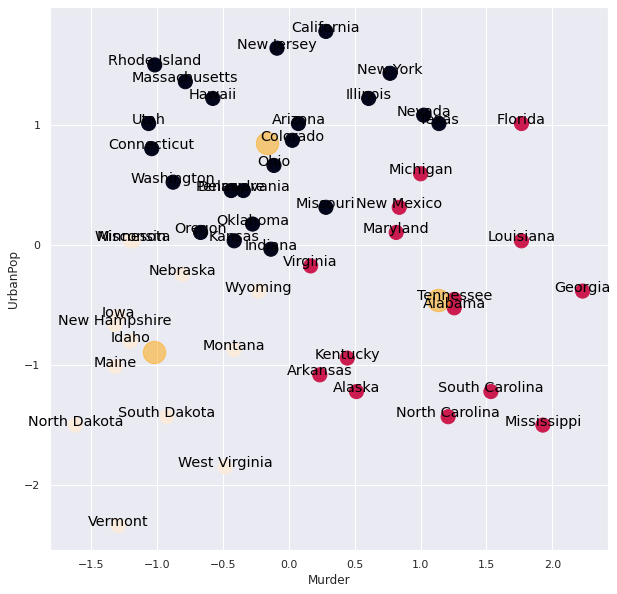

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 500 , c = 'orange' , alpha = 0.5)

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Empregando todo o conjunto de dados

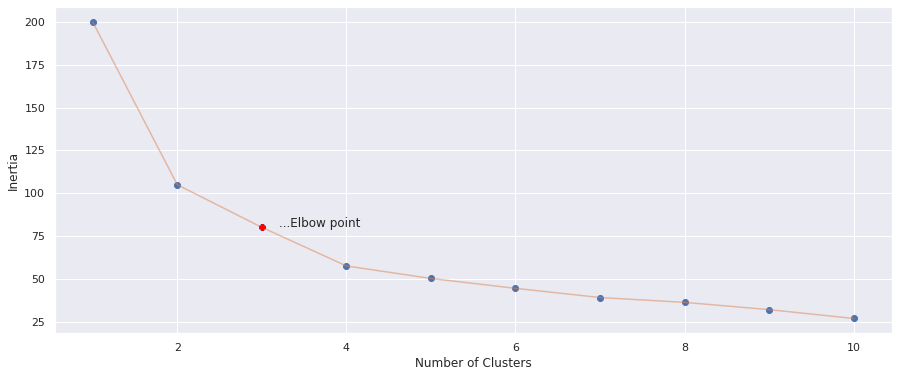

In [ ]:
# Dados
X = df

inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()   

In [ ]:
# Dados
X = df

# Declara o modelo
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 2 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 0 0 2 2 0]
[[-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.88515915 -1.0213324  -0.94990286 -0.92016524]]


Não exibimos os dados aqui graficamente. Por quê?

In [ ]:
df['cluster'] = labels
print(df)

                  Murder   Assault  UrbanPop      Rape  cluster
Alabama         1.255179  0.790787 -0.526195 -0.003451        1
Alaska          0.513019  1.118060 -1.224067  2.509424        1
Arizona         0.072361  1.493817  1.009122  1.053466        1
Arkansas        0.234708  0.233212 -1.084492 -0.186794        2
California      0.281093  1.275635  1.776781  2.088814        1
Colorado        0.025976  0.402909  0.869548  1.883901        1
Connecticut    -1.040880 -0.736484  0.799761 -1.092723        0
Delaware       -0.437875  0.815030  0.450825 -0.585834        0
Florida         1.765415  1.990786  1.009122  1.150530        1
Georgia         2.229265  0.487757 -0.386621  0.492653        1
Hawaii         -0.577030 -1.512241  1.218484 -0.111300        0
Idaho          -1.203228 -0.615272 -0.805344 -0.758392        2
Illinois        0.605789  0.948363  1.218484  0.298525        1
Indiana        -0.136372 -0.700121 -0.037685 -0.025021        0
Iowa           -1.295998 -1.391029 -0.59

# Tamanho dos Clusters

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos). 

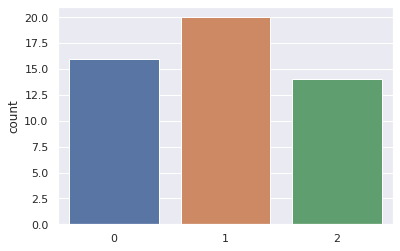

In [ ]:
df.cluster.value_counts()
sns.countplot(labels)

# Caracterizando os Grupos

Esses grupos, diferentemente de um processo de classificação (*Tx Padrão*, *Tx Especial*) não são caracterizados por um *rótulo*. Mas você pode explorar esses grupos, por exemplo verificando os valores médios, buscando características comuns para que vocês rotula-los e, portanto, caracteriza-los melhor. 

No nosso exemplo anterior, você só pode identificar que existem grupos de Empréstimos para Bens de Consumo para Jovens e Empréstimos para Capital de Giro e Outros, observando por exemplo os produtos, finalidade do empréstimo e idade média dos clientes de cada grupo.

In [ ]:
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,-0.494407,-0.386484,0.581676,-0.264310
1,1.015137,1.024120,0.199591,0.855564
2,-0.885159,-1.021332,-0.949903,-0.920165


In [ ]:
g = pd.DataFrame( df.groupby('cluster').mean() ).reset_index()

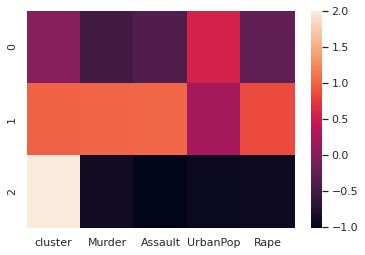

In [ ]:
sns.heatmap(g)

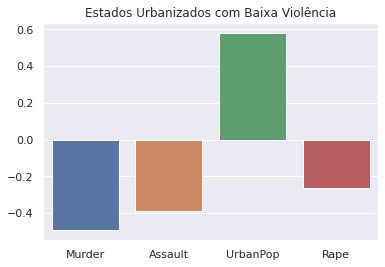

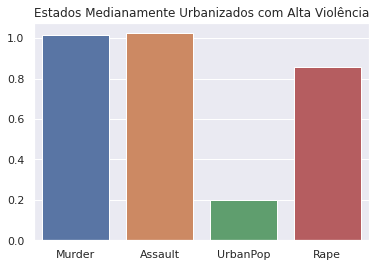

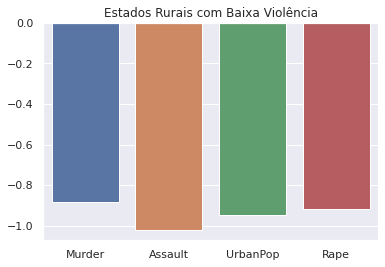

In [ ]:
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.title('Estados Urbanizados com Baixa Violência')
plt.show()
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.title('Estados Medianamente Urbanizados com Alta Violência')
plt.show()
sns.barplot(data=g[g.cluster==2].drop(columns='cluster'))
plt.title('Estados Rurais com Baixa Violência')
plt.show()

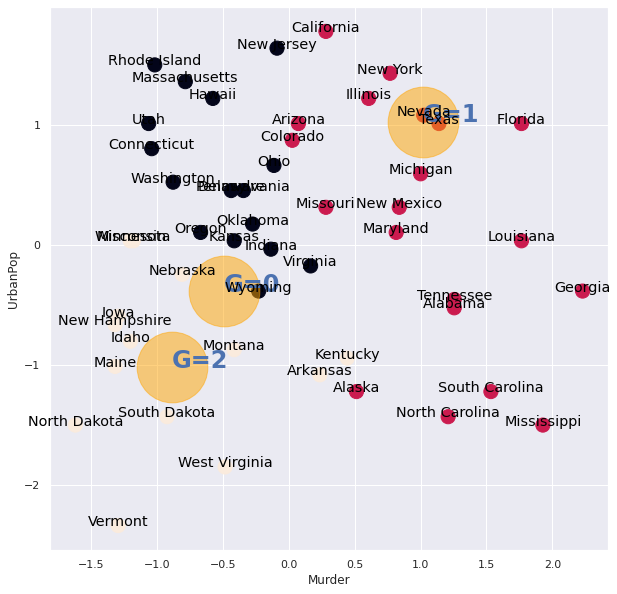

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = df.cluster , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 5000 , c = 'orange' , alpha = 0.5)
plt.text(centroids[0 , 0] , centroids[0 , 1] , 'G=0', fontsize=24, fontweight='bold', color='b')
plt.text(centroids[1 , 0] , centroids[1 , 1] , 'G=1', fontsize=24, fontweight='bold', color='b')
plt.text(centroids[2 , 0] , centroids[2 , 1] , 'G=2', fontsize=24, fontweight='bold', color='b')

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## **Experimente você**

Empregue o dataset `Breast` do Lab de trilhas anteriores e encontre e melhor agrupamento dos dados. Se forem dois grupos você pode investigar a *aderência* desses grupos com a classificação.

\* importante: em geral, e este caso certamente se aplica, não empregue o atributo classe para a clusterização. Ele pode adicionar um viés grande na formação dos grupos.

## **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
#
# set up environment T11
#

#
# import basics
# 

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 
sns.set()

# import plotly as py
# import plotly.graph_objs as go
from sklearn.cluster import KMeans

# Linear
#-------------------------------------------------------------------------------

# a little bit dirty here... just for this case...
from scipy.spatial import distance
def kmeansL(X,k=2,max_iterations=100,pos=[2,8]):
    f = plt.figure(figsize=(12, 5))
    # plt.axis('off')
    plt.yticks([])
    plt.ylim([-2.5,0.5])
    # plt.xlim([0,70])
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.array(pos) # np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    print(list(X.T))
    print(centroids)
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    print(P)
    zeros = np.full((len(X)), 0, dtype=int)
    sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
    sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
    plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
    plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
    plt.text(15,zeros[0:1]+0.2,'i = ' + str(0))
    for j in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        print(centroids)
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
        print(X.T)
        print(P)
        zeros = np.full((len(X)), -(j+1) , dtype=int)
        sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
        sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
        plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
        plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
        plt.text(15,zeros[0:1]+0.2,'i = ' + str(j+1))
        
    return P # , X, centroids

'''
P, PP, centroids = kmeansL(X,k=2,pos=[2,8])
P, PP, centroids = kmeansL(X,k=2,pos=[2,18])
P, PP, centroids = kmeansL(X,k=2,pos=[5,18])
P, PP, centroids = kmeansL(X,k=2,pos=[12,15])
'''

# Spacial
#-------------------------------------------------------------------------------

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    j=0 

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        f = plt.figure(figsize=(7, 7))
        plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.85);

        plt.text(centers[0, 0]-0.3, centers[0, 1]+0.3, 'C1', fontsize=16, fontweight='bold')
        plt.text(centers[1, 0]-0.3, centers[1, 1]+0.3, 'C2', fontsize=16, fontweight='bold')
        plt.text(centers[2, 0]-0.3, centers[2, 1]+0.3, 'C3', fontsize=16, fontweight='bold')
        plt.text(centers[3, 0]-0.3, centers[3, 1]+0.3, 'C4', fontsize=16, fontweight='bold')
        
        plt.title('Kmeans, Iteração i= ' + str(j))
        j=j + 1
        
        plt.show()
    return centers, labels

# centers, labels = find_clusters(X, 4)

print('T11 Set Up completed!')


T11 Set Up completed!
